# Laboratorio 1 - Análisis Exploratorio de Datos
### Indicadores Macroeconómicos Mundiales

Grupo 7:
- Ariel Espinoza
- Martin García 
- Williams Ajata
- Catalina Yañez

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Configuración de gráficos
plt.style.use('default')
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['figure.figsize'] = (12, 8)

## 1. Carga y Contextualización del Dataset

In [3]:
df = pd.read_csv("world_bank_data_2025.csv")
df.head()

,country_name,country_id,year,Inflation (CPI %),GDP (Current USD),GDP per Capita (Current USD),Unemployment Rate (%),"Interest Rate (Real, %)","Inflation (GDP Deflator, %)",GDP Growth (% Annual),Current Account Balance (% GDP),Government Expense (% of GDP),Government Revenue (% of GDP),Tax Revenue (% of GDP),Gross National Income (USD),Public Debt (% of GDP)
0,Aruba,aw,2010,2.078141,2.453597e+09,24093.140151,NaN,11.666131,-1.223407,-2.733457,-18.752537,NaN,NaN,NaN,2.313385e+09,NaN
1,Aruba,aw,2011,4.316297,2.637859e+09,25712.384302,NaN,4.801974,4.005674,3.369237,-9.877656,NaN,NaN,NaN,2.391841e+09,NaN
2,Aruba,aw,2012,0.627472,2.615208e+09,25119.665545,NaN,8.200875,0.184033,-1.040800,3.473451,NaN,NaN,NaN,2.499118e+09,NaN
3,Aruba,aw,2013,-2.372065,2.727850e+09,25813.576727,NaN,10.709709,-1.995948,6.431483,-11.813206,NaN,NaN,NaN,2.563517e+09,NaN
4,Aruba,aw,2014,0.421441,2.790850e+09,26129.839062,NaN,3.213869,3.958897,-1.586575,-4.658577,NaN,NaN,NaN,2.688102e+09,NaN


**Contexto del dataset**  
- Contiene indicadores macroeconómicos de diversos países a lo largo de varios años.  
- Fuente: Banco Mundial y otras fuentes internacionales.  
- Motivación:  Nos intereso este dataset ya que es parte de la vida real y permite realizar un análisis de como los países se enfrentan a crisis o crecimiento económico, de esta forma podemos relacionar las variables y concluir las posibles causantes de estas.


## 2. Limpieza y Preparación de Datos

In [4]:
# Valores faltantes
null_info = pd.DataFrame({
    "Valores_Nulos": df.isnull().sum(),
    "Porcentaje_Nulos": (df.isnull().sum() / len(df)) * 100
})
null_info[null_info["Valores_Nulos"] > 0]


,Valores_Nulos,Porcentaje_Nulos
Inflation (CPI %),778,22.407834
GDP (Current USD),539,15.524194
GDP per Capita (Current USD),534,15.380184
Unemployment Rate (%),677,19.498848
"Interest Rate (Real, %)",1737,50.028802
"Inflation (GDP Deflator, %)",568,16.359447
GDP Growth (% Annual),560,16.129032
Current Account Balance (% GDP),909,26.180876
Government Expense (% of GDP),1652,47.580645
Government Revenue (% of GDP),1643,47.321429


## 3. Análisis Exploratorio de Datos


In [5]:
# Identificar columnas numéricas y categóricas
num_cols = df.select_dtypes(include=[np.number]).columns
cat_cols = df.select_dtypes(exclude=[np.number]).columns

print("Variables numéricas:", list(num_cols))
print("Variables categóricas:", list(cat_cols))


Variables numéricas: ['year', 'Inflation (CPI %)', 'GDP (Current USD)', 'GDP per Capita (Current USD)', 'Unemployment Rate (%)', 'Interest Rate (Real, %)', 'Inflation (GDP Deflator, %)', 'GDP Growth (% Annual)', 'Current Account Balance (% GDP)', 'Government Expense (% of GDP)', 'Government Revenue (% of GDP)', 'Tax Revenue (% of GDP)', 'Gross National Income (USD)', 'Public Debt (% of GDP)']
Variables categóricas: ['country_name', 'country_id']


In [6]:
# Detección de valores atípicos
##REVISAR
df[(df["Unemployment Rate (%)"] < 0) | (df["Unemployment Rate (%)"] > 50)]


,country_name,country_id,year,Inflation (CPI %),GDP (Current USD),GDP per Capita (Current USD),Unemployment Rate (%),"Interest Rate (Real, %)","Inflation (GDP Deflator, %)",GDP Growth (% Annual),Current Account Balance (% GDP),Government Expense (% of GDP),Government Revenue (% of GDP),Tax Revenue (% of GDP),Gross National Income (USD),Public Debt (% of GDP)


In [7]:
# Estadísticos de las numéricas
df[num_cols].describe().T


,count,mean,std,min,25%,50%,75%,max
year,3472.0,2.017500e+03,4.610436e+00,2.010000e+03,2.013750e+03,2.017500e+03,2.021250e+03,2.025000e+03
Inflation (CPI %),2694.0,6.233154e+00,1.972690e+01,-6.687321e+00,1.402112e+00,3.213523e+00,6.186626e+00,5.572018e+02
GDP (Current USD),2933.0,3.964323e+11,1.749315e+12,3.210541e+07,6.264757e+09,2.587360e+10,1.874939e+11,2.772071e+13
GDP per Capita (Current USD),2938.0,1.848350e+04,2.730181e+04,1.930071e+02,2.280749e+03,6.827668e+03,2.372702e+04,2.565805e+05
Unemployment Rate (%),2795.0,7.841141e+00,5.964358e+00,1.000000e-01,3.611000e+00,5.771000e+00,1.073150e+01,3.535900e+01
"Interest Rate (Real, %)",1735.0,5.405051e+00,9.740924e+00,-8.113212e+01,1.734057e+00,5.079009e+00,8.869434e+00,6.188260e+01
"Inflation (GDP Deflator, %)",2904.0,6.634865e+00,2.582020e+01,-2.876014e+01,1.218347e+00,3.223184e+00,6.905463e+00,9.215357e+02
GDP Growth (% Annual),2912.0,2.853544e+00,6.053786e+00,-5.433615e+01,9.970319e-01,3.100442e+00,5.355110e+00,8.682675e+01
Current Account Balance (% GDP),2563.0,-2.363241e+00,1.374099e+01,-6.087775e+01,-7.496525e+00,-2.656009e+00,1.854710e+00,2.357506e+02
Government Expense (% of GDP),1820.0,2.732536e+01,1.264246e+01,1.358845e-04,1.751148e+01,2.600085e+01,3.488458e+01,1.037258e+02


In [8]:
# Resumen de variables categóricas
for c in cat_cols:
    print(f"\n{c}:")
    print(df[c].value_counts().head(5))


country_name:
country_name
Aruba            16
Oman             16
Malaysia         16
Namibia          16
New Caledonia    16
Name: count, dtype: int64

country_id:
country_id
aw    16
om    16
my    16
na    16
nc    16
Name: count, dtype: int64


In [9]:
#Identificación de outliers

def detectar_outliers(col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5*IQR
    limite_superior = Q3 + 1.5*IQR
    outliers = df[(df[col] < limite_inferior) | (df[col] > limite_superior)][col]
    return outliers

for col in num_cols:
    outliers = detectar_outliers(col)
    print(f"{col}: {len(outliers)} outliers detectados")


year: 0 outliers detectados
Inflation (CPI %): 201 outliers detectados
GDP (Current USD): 374 outliers detectados
GDP per Capita (Current USD): 223 outliers detectados
Unemployment Rate (%): 94 outliers detectados
Interest Rate (Real, %): 139 outliers detectados
Inflation (GDP Deflator, %): 297 outliers detectados
GDP Growth (% Annual): 217 outliers detectados
Current Account Balance (% GDP): 208 outliers detectados
Government Expense (% of GDP): 28 outliers detectados
Government Revenue (% of GDP): 29 outliers detectados
Tax Revenue (% of GDP): 16 outliers detectados
Gross National Income (USD): 353 outliers detectados
Public Debt (% of GDP): 34 outliers detectados


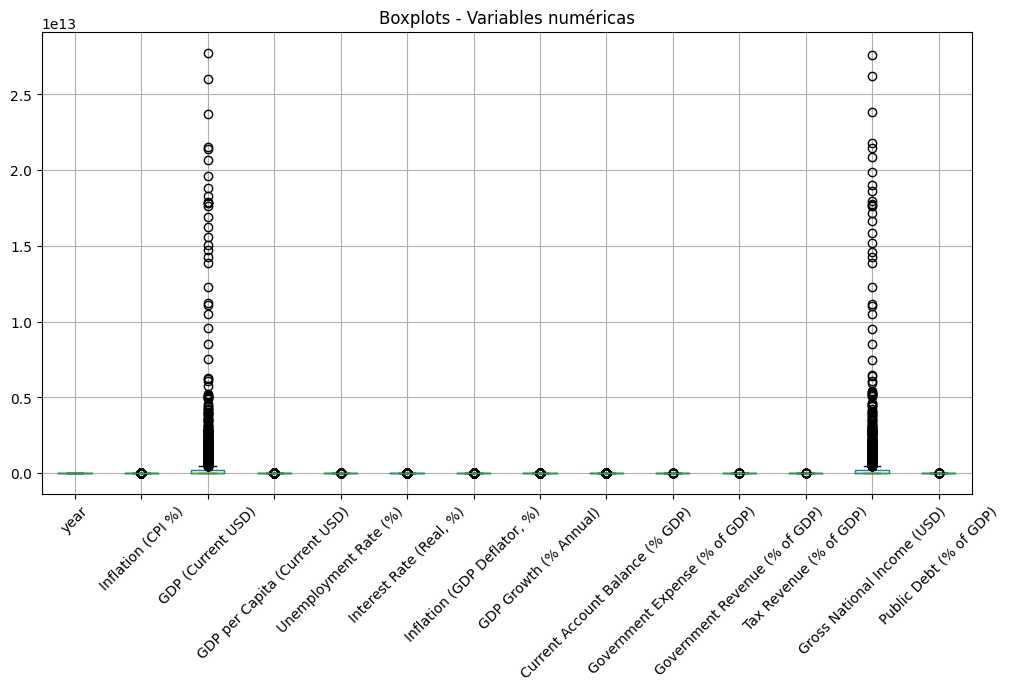

In [10]:
df[num_cols].boxplot(figsize=(12,6), rot=45)
plt.title("Boxplots - Variables numéricas")
plt.show()


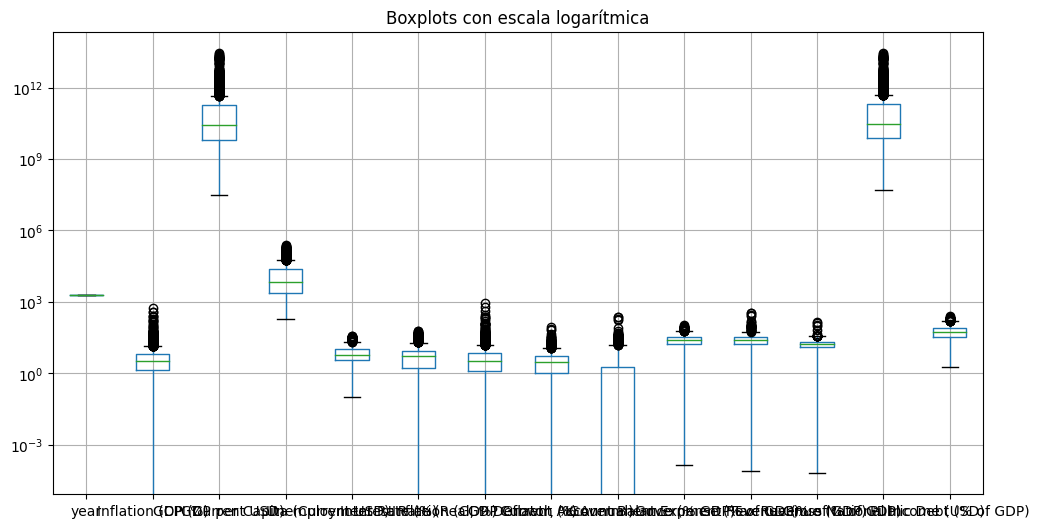

In [11]:
plt.figure(figsize=(12,6))
df[num_cols].boxplot()
plt.yscale("log")
plt.title("Boxplots con escala logarítmica")
plt.show()

In [12]:
# Top 10 países por PIB promedio
df.groupby("country_name")["GDP (Current USD)"].mean().sort_values(ascending=False).head(10)


country_name
United States         1.993306e+13
China                 1.237015e+13
Japan                 5.104524e+12
Germany               3.884012e+12
United Kingdom        2.861489e+12
France                2.738970e+12
India                 2.469549e+12
Italy                 2.084946e+12
Brazil                2.067362e+12
Russian Federation    1.808548e+12
Name: GDP (Current USD), dtype: float64

In [13]:
# Top 10 países por crecimiento promedio
df.groupby("country_name")["GDP Growth (% Annual)"].mean().sort_values(ascending=False).head(10)


country_name
Guyana          14.189349
Ethiopia         8.664796
Turkmenistan     7.985726
Tajikistan       7.187093
China            6.833375
Rwanda           6.815321
Ireland          6.388338
Bangladesh       6.382259
Maldives         6.375187
Uzbekistan       6.297946
Name: GDP Growth (% Annual), dtype: float64

## 4. Visualizaciones


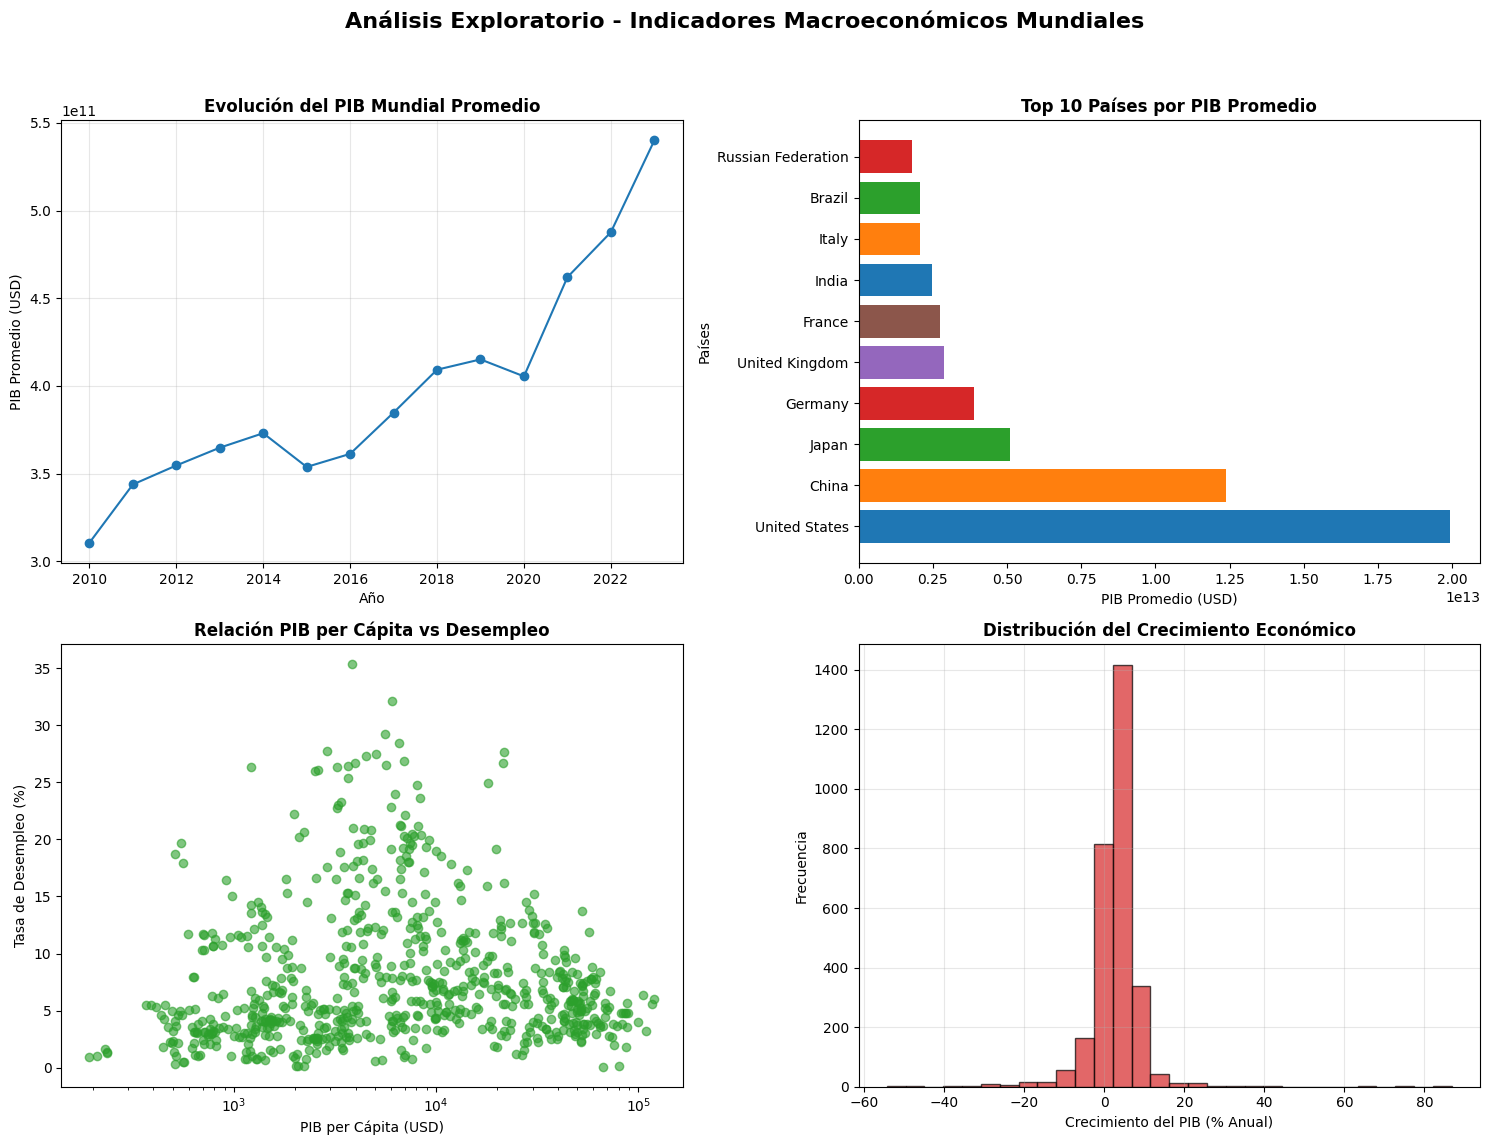

In [14]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
colors = ['#1f77b4','#ff7f0e','#2ca02c','#d62728','#9467bd','#8c564b']

# Evolución PIB mundial
yearly_gdp = df.groupby("year")["GDP (Current USD)"].mean()
axes[0,0].plot(yearly_gdp.index, yearly_gdp.values, marker="o", color=colors[0])
axes[0,0].set_title("Evolución del PIB Mundial Promedio", fontweight="bold")
axes[0,0].set_xlabel("Año")
axes[0,0].set_ylabel("PIB Promedio (USD)")
axes[0,0].grid(True, alpha=0.3)

# Top 10 PIB
top_10 = df.groupby("country_name")["GDP (Current USD)"].mean().nlargest(10)
axes[0,1].barh(top_10.index, top_10.values, color=colors[:10])
axes[0,1].set_title("Top 10 Países por PIB Promedio", fontweight="bold")
axes[0,1].set_xlabel("PIB Promedio (USD)")
axes[0,1].set_ylabel("Países")

# Relación PIB per cápita vs desempleo
sample_df = df.sample(min(1000,len(df)))
axes[1,0].scatter(sample_df["GDP per Capita (Current USD)"],
                  sample_df["Unemployment Rate (%)"], alpha=0.6, color=colors[2])
axes[1,0].set_title("Relación PIB per Cápita vs Desempleo", fontweight="bold")
axes[1,0].set_xlabel("PIB per Cápita (USD)")
axes[1,0].set_ylabel("Tasa de Desempleo (%)")
axes[1,0].set_xscale("log")

# Distribución crecimiento económico
growth_data = df["GDP Growth (% Annual)"].dropna()
axes[1,1].hist(growth_data, bins=30, color=colors[3], edgecolor="black", alpha=0.7)
axes[1,1].set_title("Distribución del Crecimiento Económico", fontweight="bold")
axes[1,1].set_xlabel("Crecimiento del PIB (% Anual)")
axes[1,1].set_ylabel("Frecuencia")
axes[1,1].grid(True, alpha=0.3)

plt.suptitle("Análisis Exploratorio - Indicadores Macroeconómicos Mundiales", 
             fontsize=16, fontweight="bold")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()



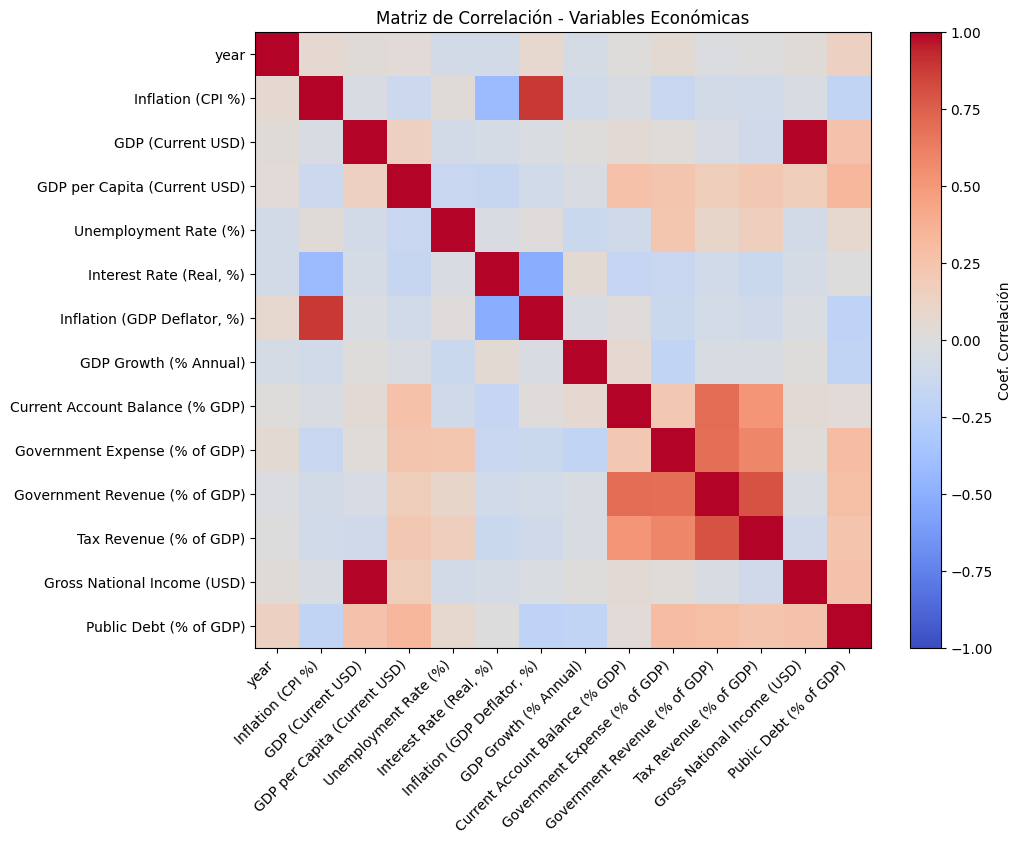

In [15]:
# Matriz de correlación
numeric_cols = df.select_dtypes(include=[np.number]).columns
corr = df[numeric_cols].corr()

plt.figure(figsize=(10,8))
im = plt.imshow(corr, cmap="coolwarm", vmin=-1, vmax=1)
plt.xticks(range(len(corr)), corr.columns, rotation=45, ha="right")
plt.yticks(range(len(corr)), corr.columns)
plt.colorbar(im, label="Coef. Correlación")
plt.title("Matriz de Correlación - Variables Económicas")
plt.show()


## 5. Selección de Variables
- **Principales**: `GDP (Current USD)`, `GDP Growth (% Annual)`  
- **Secundarias**: `Inflation (CPI %)`, `Unemployment Rate (%)`  

**Justificación**:  
- PIB y crecimiento son indicadores centrales del desempeño económico.  
- Inflación y desempleo son críticos en política económica.  
- Existen correlaciones interesantes entre ellas. 

## 6. Pregunta de Investigación
Analizando los datos, nos dimos cuenta de que los paises más desarrolados tienen in PIB mucho más elevado que el de aquellos que no, en especial aquellas que pueden ser consideradas potencias mundiales, cómo China y EE.UU. Además, el crecimiento del PIB en el mundo empezó a crecer en gran manera en 2020, lo que justamente coincide con la pandemia, lo que nos deja con la idea de que algunos paises pudieron aprovechar muy bien la situación para poder crecer y desarrollarse durante este periodo, teninendo como consecuencia, que su PIB aumente. Sin embargo, siguen habiendo paises que se quedaron algo atras en comparación a otros, dando como resultado que tengan una tasa de desempleo más alta, ya que no supieron adaptarse tan bien como otros, evidenciando que, mientras más alto el PIB, la empleabilidad aumenta. 

Con esto en mente, no planteamos la siguiente pregunta de investigación:

**¿Aquellos paises con PIB mucho más bajos que el resto, si este llegará a aumentar durante el tiempo, su tasa de desempleo efectivamente disminuiría y lograrían alcanzar un nivel de estabilidad comparable a paises más desarrollados?**
